# PCR nanodrop results

Simple plots for visualizing nanodrop results of PCR products.

In [1]:
import pandas as pd
%load_ext rpy2.ipython

In [38]:
%%R
library(ggplot2)
library(ggpubr)
library(RColorBrewer)
library(reshape2)

In [25]:
%%R

# Basic barplot showing yields of all samples requires sample name column to
# be valled "Sample" and ng / ul DNA measured to be called "ng_ul"

basic.bars <- function(df, title='', x_lab='', y_lab='ng/ul DNA'){
    
    colors <- colorRampPalette(brewer.pal(8, "Dark2"))(nrow(df))
    
    ggplot(df, aes(x=Sample, y=Yield, fill=Sample)) + 
            geom_bar(stat='identity', color='black', size=1, width=0.7) +
            theme_pubr() + theme(legend.position='none') + scale_fill_manual(values=colors) +
            theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
            labs(title=title, x=x_lab, y=y_lab)
    
}

In [48]:
%%R

# Boxplot showing median values for yeild and purity ratios

basic.box <- function(df, title='', x_lab='', y_lab=''){
    
    df.melt <- melt(df)
    
    colors <- colorRampPalette(brewer.pal(8, "Dark2"))(length(unique(df.melt$variable)))
    
    ggplot(df.melt,  aes(x=variable, y=value, fill=variable)) +
            geom_boxplot(color='black', alpha=0.7) +
            theme_pubr() + theme(legend.position='none') +
            scale_fill_manual(values=colors) +
            labs(title=title, x=x_lab, y=y_lab) +
            facet_wrap(~variable, scales = "free") +
             theme(axis.title.x=element_blank(),
                    axis.text.x=element_blank(),
                    axis.ticks.x=element_blank()
                  )
    
}

## 8-24-21

In [31]:
PCR_8_24 = pd.read_csv('../tables/VRn-PCR-nanodrop-unpurified-8-24-21.csv')

R[write to console]: Saving 5 x 5 in image



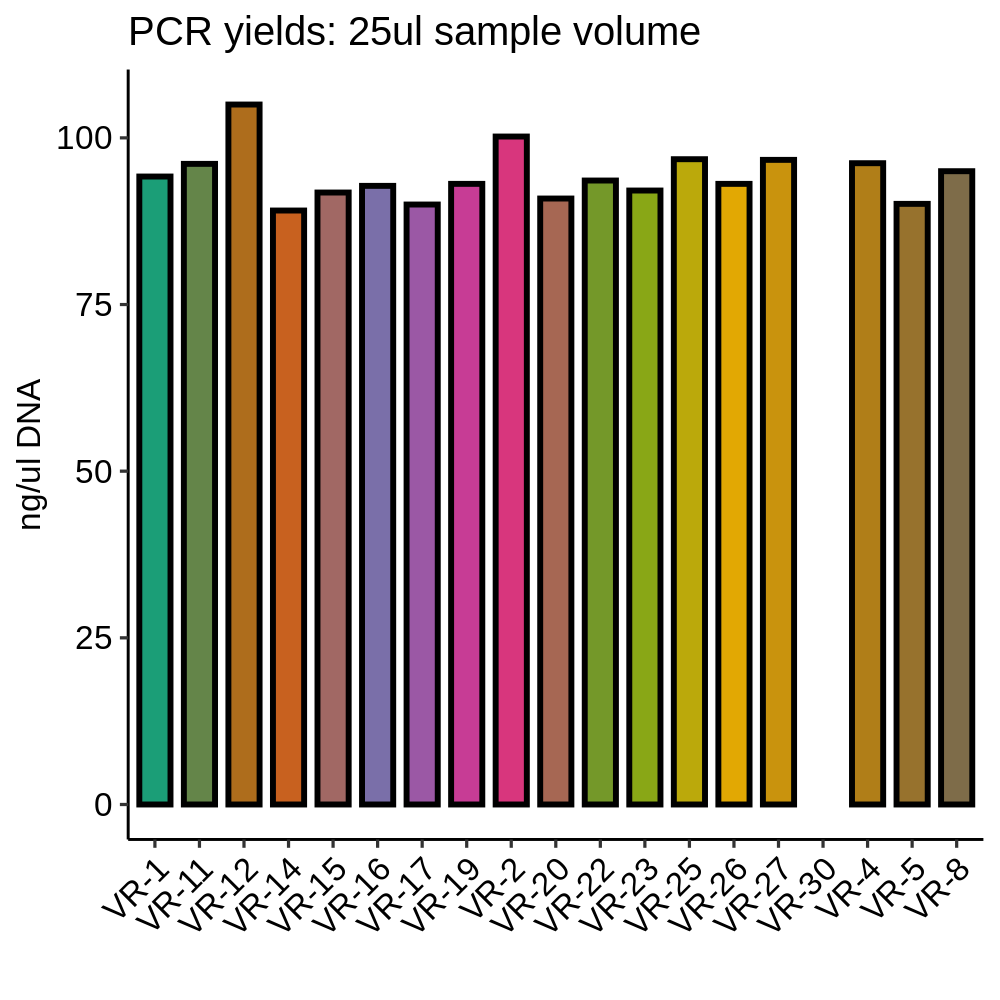

In [55]:
%%R -i PCR_8_24 -w 5 -h 5 --units in -r 200

bars.8.24 <- basic.bars(PCR_8_24, title='PCR yields: 25ul sample volume')
ggsave('../images/bars.8.24.PCR.plot.png')
bars.8.24

R[write to console]: Using Sample as id variables



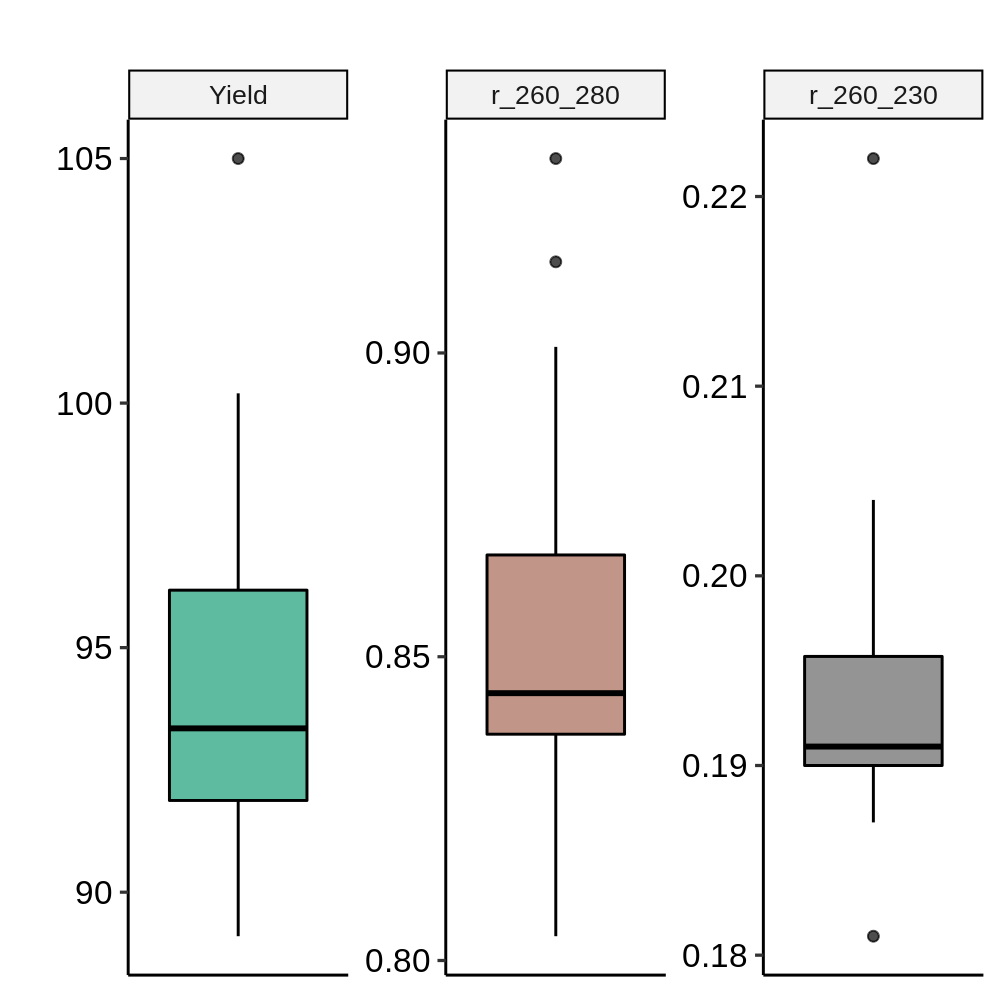

In [50]:
%%R -i PCR_8_24 -w 5 -h 5 --units in -r 200

basic.box(PCR_8_24)